In [58]:
import os, glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_DIR = "../data"

In [3]:
d_train = pd.read_csv(os.path.join(DATA_DIR, "train.csv"))

In [4]:
d_train.head()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a ...",Position,Adequate
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform be...,Claim,Adequate
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The...",Evidence,Adequate
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by ali...,Counterclaim,Adequate


In [5]:
d_test = pd.read_csv(os.path.join(DATA_DIR, "test.csv"))

In [6]:
d_test

,discourse_id,essay_id,discourse_text,discourse_type
0,a261b6e14276,D72CB1C11673,Making choices in life can be very difficult. ...,Lead
1,5a88900e7dc1,D72CB1C11673,Seeking multiple opinions can help a person ma...,Position
2,9790d835736b,D72CB1C11673,it can decrease stress levels,Claim
3,75ce6d68b67b,D72CB1C11673,a great chance to learn something new,Claim
4,93578d946723,D72CB1C11673,can be very helpful and beneficial.,Claim
5,2e214524dbe3,D72CB1C11673,When making a decision there is a chance that ...,Evidence
6,84812fc2ab9f,D72CB1C11673,Everyone is different and may have more experi...,Evidence
7,c668ff840720,D72CB1C11673,Seeking others opinion can be very helpful and...,Claim
8,739a6d00f44a,D72CB1C11673,Taking other peoples advice and doing what the...,Evidence
9,bcfae2c9a244,D72CB1C11673,You can learn from others experiences by seeki...,Concluding Statement


In [7]:
d_submit = pd.read_csv(os.path.join(DATA_DIR, "sample_submission.csv"))

In [8]:
d_submit

,discourse_id,Ineffective,Adequate,Effective
0,a261b6e14276,0.20,0.60,0.40
1,5a88900e7dc1,3.00,6.00,1.00
2,9790d835736b,1.00,2.00,3.00
3,75ce6d68b67b,0.33,0.34,0.33
4,93578d946723,0.01,0.24,0.47
5,2e214524dbe3,0.20,0.60,0.40
6,84812fc2ab9f,3.00,6.00,1.00
7,c668ff840720,1.00,2.00,3.00
8,739a6d00f44a,0.33,0.34,0.33
9,bcfae2c9a244,0.01,0.24,0.47


### Train

In [9]:
d_train = d_train.sort_values('essay_id')

In [10]:
d_train.shape

(36765, 5)

In [11]:
d_train.discourse_id.unique().shape

(36765,)

In [12]:
d_train.head()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness
14340,fe6dfbd53216,00066EA9880D,Driverless cars are exaclty what you would exp...,Lead,Adequate
14348,3e75ef7e0262,00066EA9880D,With all these things that could possibly go w...,Concluding Statement,Adequate
14347,cb665a65fb75,00066EA9880D,Should the manufacturer of the car be blamed o...,Evidence,Effective
14346,d16ff143cb0b,00066EA9880D,who to blame for the wreck if there were possi...,Claim,Effective
14341,ca9e1b60c9fb,00066EA9880D,The developement of these cars should be stopp...,Position,Effective


In [13]:
d_train[d_train.discourse_id == "fe6dfbd53216"]

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness
14340,fe6dfbd53216,00066EA9880D,Driverless cars are exaclty what you would exp...,Lead,Adequate


In [14]:
d_train[d_train.discourse_id == "fe6dfbd53216"].discourse_text[14340]

'Driverless cars are exaclty what you would expect them to be. Cars that will drive without a person actually behind the wheel controlling the actions of the vehicle. The idea of driverless cars going in to developement shows the amount of technological increase that the wolrd has made. The leader of this idea of driverless cars are the automobiles they call Google cars. The arduous task of creating safe driverless cars has not been fully mastered yet. '

In [16]:
d_train.essay_id.value_counts()

4CA37D113612    23
900A879708F0    23
91B1F82B2CF1    23
6F271187D67D    22
73F69FA2E0E3    22
                ..
54B7666CDA35     1
A32414F5B216     1
D6A32ABCAB53     1
E4559E81E304     1
FFFF80B8CC2F     1
Name: essay_id, Length: 4191, dtype: int64

In [17]:
d_train[d_train.essay_id == "00066EA9880D"]

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness
14340,fe6dfbd53216,00066EA9880D,Driverless cars are exaclty what you would exp...,Lead,Adequate
14348,3e75ef7e0262,00066EA9880D,With all these things that could possibly go w...,Concluding Statement,Adequate
14347,cb665a65fb75,00066EA9880D,Should the manufacturer of the car be blamed o...,Evidence,Effective
14346,d16ff143cb0b,00066EA9880D,who to blame for the wreck if there were possi...,Claim,Effective
14341,ca9e1b60c9fb,00066EA9880D,The developement of these cars should be stopp...,Position,Effective
14344,7d52c3216a0e,00066EA9880D,Another thing that can go wrong with these car...,Claim,Effective
14343,d920880f4341,00066EA9880D,This is such a dangerous thing because we all ...,Evidence,Effective
14342,6cf2157f4f19,00066EA9880D,the driver will be alerted when they will need...,Claim,Effective
14345,30930de50889,00066EA9880D,Every person with any kind of technological de...,Evidence,Effective


In [49]:
discourse_type_order = ["Lead", "Position", "Claim", "Counterclaim", "Rebuttal", "Evidence", "Concluding Statement"]

In [24]:
effectiveness_order = ["Ineffective", "Adequate", "Effective"]

In [21]:
d_train.discourse_type.value_counts()

Evidence                12105
Claim                   11977
Position                 4024
Concluding Statement     3351
Lead                     2291
Counterclaim             1773
Rebuttal                 1244
Name: discourse_type, dtype: int64

In [23]:
d_train.discourse_effectiveness.value_counts()

Adequate       20977
Effective       9326
Ineffective     6462
Name: discourse_effectiveness, dtype: int64

In [47]:
d_train_count = d_train.groupby(['discourse_type', 'discourse_effectiveness'], as_index=False).count()

In [55]:
d_train_count.discourse_type = pd.Categorical(d_train_count.discourse_type, ordered=True, categories=discourse_type_order)

In [56]:
d_train_count.discourse_effectiveness = pd.Categorical(d_train_count.discourse_effectiveness, ordered=True, categories=effectiveness_order)

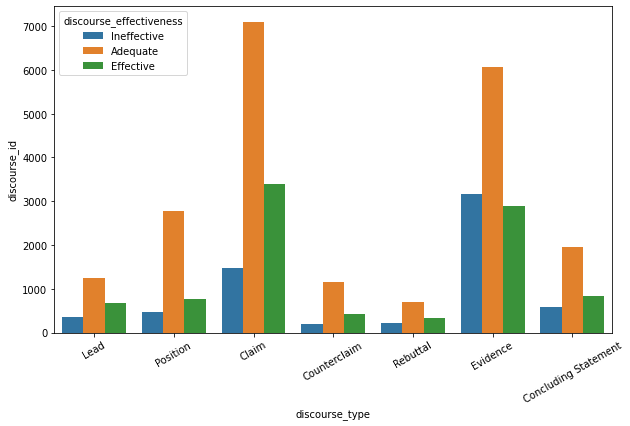

In [70]:
plt.figure(figsize=(10, 6))
g = sns.barplot(data = d_train_count, x='discourse_type', y='discourse_id', hue='discourse_effectiveness')
g.set_xticklabels(g.get_xticklabels(),rotation = 30)
plt.show()

In [50]:
for type_ in discourse_type_order:
    for eff in effectiveness_order:
        slicing = d_train[(d_train.discourse_type == type_) & (d_train.discourse_effectiveness == eff)]
        
        print(type_.upper(), " - ", eff.upper())
        for text in slicing.discourse_text.tolist()[:3]:
            print(text.strip())
            print("\n")
        print("="*50)

LEAD  -  INEFFECTIVE
President Obama has done nothing to improve our society.  If anything, he has created the worst society this world has ever seen.


I would like to make a request.


Is there really a new kind of life on mars. No! We are the only life in this universe. Plus if people lived on mars, how could they build such a huge amount of rock into a face so perfectly.


LEAD  -  ADEQUATE
Driverless cars are exaclty what you would expect them to be. Cars that will drive without a person actually behind the wheel controlling the actions of the vehicle. The idea of driverless cars going in to developement shows the amount of technological increase that the wolrd has made. The leader of this idea of driverless cars are the automobiles they call Google cars. The arduous task of creating safe driverless cars has not been fully mastered yet.


I heard you are considering changing the schools policy so that the students may not participate in sports or other activities unless they have 

In [74]:
d_train['text_length'] = d_train.discourse_text.apply(lambda x: len(x.split()))

In [78]:
d_train.columns

Index(['discourse_id', 'essay_id', 'discourse_text', 'discourse_type',
       'discourse_effectiveness', 'text_length'],
      dtype='object')

<AxesSubplot:xlabel='discourse_type', ylabel='text_length'>

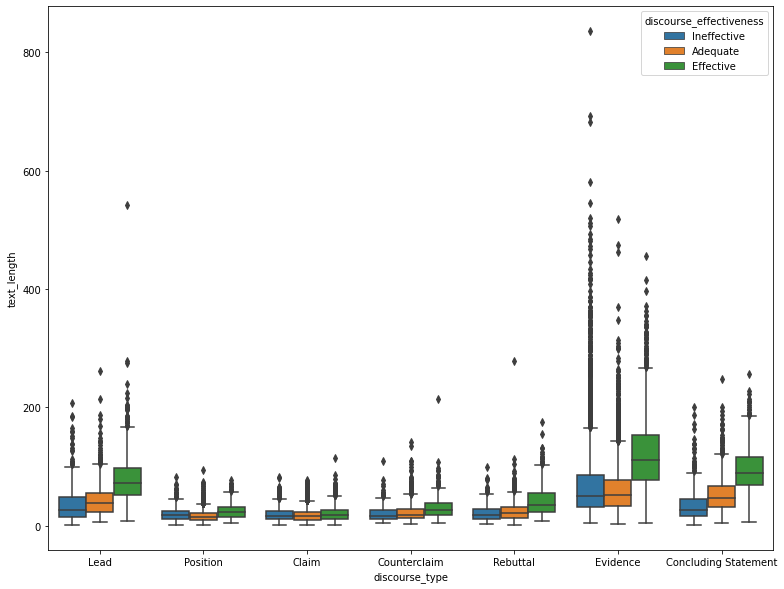

In [84]:
plt.figure(figsize=(13, 10))
sns.boxplot(data = d_train, 
            y='text_length', 
            x='discourse_type', 
            hue='discourse_effectiveness', 
            order=discourse_type_order, hue_order=effectiveness_order)

In [87]:
d_train[(d_train.discourse_type == 'Evidence') & 
        (d_train.discourse_effectiveness == 'Ineffective') & 
        (d_train.text_length > 600)].discourse_text.tolist()

['the presidental election is to find a new leader of the united states he basicly has to pass laws and do taxes we vote to make sure we get the right president we dont want someone thats gonna make silly laws and taxes the people to much the president has to take charge has to go to\xa0 world meetings has to be a role model for the younger people in the world the president has to do alot of work now the vice president has to do what the president cant do sometimes other times hes just there to help the president when he needs him like when the presidents gone on vaction the vice president does his work for him but sometimes the vice president messes up with paperwork so thats why we need to chose the best president not someone random that makes silly laws and to mess up on paperwork and to raise the taxes on the people the president also helps with things going on around the world he also a role model not only to college kids but to highschool kids to so thats why we vote not to pick 